In [1]:
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import pdb
import time
import calendar
import pyfftw
from tqdm.notebook import tqdm
from comb_utils import *

In [2]:
def transfer_mask(A,B):
    # A modes to B modes
    '''For each B mode, find one A mode that is closest in frequency to the specified B mode'''
    ωA = A.ωarr_adjusted
    ωB = B.ωarr_adjusted
    Aidx = 0
    mask = []
    for ωb in ωB:
        currDiff = np.abs(ωA[Aidx]-ωb)
        while np.abs(ωA[Aidx]-ωb)<=currDiff:
            currDiff = np.abs(ωA[Aidx]-ωb)
            Aidx += 1 
            if Aidx == len(ωA):
                break
        Aidx -= 1
        mask.append(Aidx)
    return np.array(mask)

ω_start = 193.41602939368178 THz, ω_end = 193.41063812869876 THz
λ_start = 1549.987655830728 nm, λ_end = 1550.0308612834056 nm
normalized detunings = [ -8 , 20 ] (relevant parameters: δnorm_range)
sweep speed (ω space) = 5391264.98303125 GHz/s 
sweep speed (λ space) = 43205.45267761931 nm/s
real time = 1e-06, normalized time = 192.54517796539992 (relevant parameters: total_time), dt = 0.001
Simulation points = 3209086.0 (relevant parameters: dt)
detuning at start = -1.54036142371875 GHz, detuning at end = 3.8509035593125 GHz (relevant parametes: ω_range, λ_range)
Dint is a polynomial of order 9.
g0 = 1.0199359714377958, Veff = 3.6128315516282617e-16, F^2 = 10.68475964367639


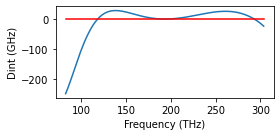

ω_start = 137.05523957184408 THz, ω_end = 137.0514020558362 THz
λ_start = 2187.384144791118 nm, λ_end = 2187.445392772132 nm
normalized detunings = [ -8 , 20 ] (relevant parameters: δnorm_range)
sweep speed (ω space) = 3837516.007890625 GHz/s 
sweep speed (λ space) = 61247.98101358707 nm/s
real time = 1e-06, normalized time = 137.05414313869898 (relevant parameters: total_time), dt = 0.001
Simulation points = 9136942.0 (relevant parameters: dt)
detuning at start = -1.096433145109375 GHz, detuning at end = 2.74108286278125 GHz (relevant parametes: ω_range, λ_range)
g0 = 0.26292329054726404, Veff = 7.037167544041137e-16, F^2 = 30.82666329530731


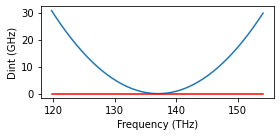

In [3]:
A = microring(R=25e-6,height=1e-6,width=2.3e-6,ng=2.2,Qc=1e6,Qi=1e6,n2=2.4e-19,
                δnorm_range=[-8,20],ω_range=[],λ_range=[],ω0=299792458/1.550e-6,λ0=None,
                total_time=1e-6,ω_sweep_speed=None,λ_sweep_speed=None,Qc_import=10**np.linspace(5,7,2**8),
                Dint_file='2.300w_58.5r_0.960h.csv',dt=1e-3,
                Nmodes=2**8,pump=50e-3,snapshots=2000,mode_offset=0,Dint_degrees=9)

D2 = 15e6 # Hz

numModes = 2**7
mu = np.arange(-numModes/2,numModes/2)
Dint = mu**2*D2/2

B = microring(R=80e-6,height=1e-6,width=1.4e-6,ng=2.2,Qc=1e6,Qi=1e6,n2=2.4e-19,
                δnorm_range=[-8,20],ω_range=[],λ_range=[],ω0=A.ωarr_adjusted[63],λ0=None,
                total_time=1e-6,ω_sweep_speed=None,λ_sweep_speed=None,Dint_file=None,dt=1e-3,
                Nmodes=numModes,pump=200e-3,snapshots=2000,mode_offset=0,Dint_degrees=9,set_Dint=Dint)


In [4]:
A.ω0/A.Δωext[0]

1009076.718999999

In [5]:
A.split_step(plan_fft=True)

100%|██████████| 2000/2000 [02:23<00:00, 13.91it/s]


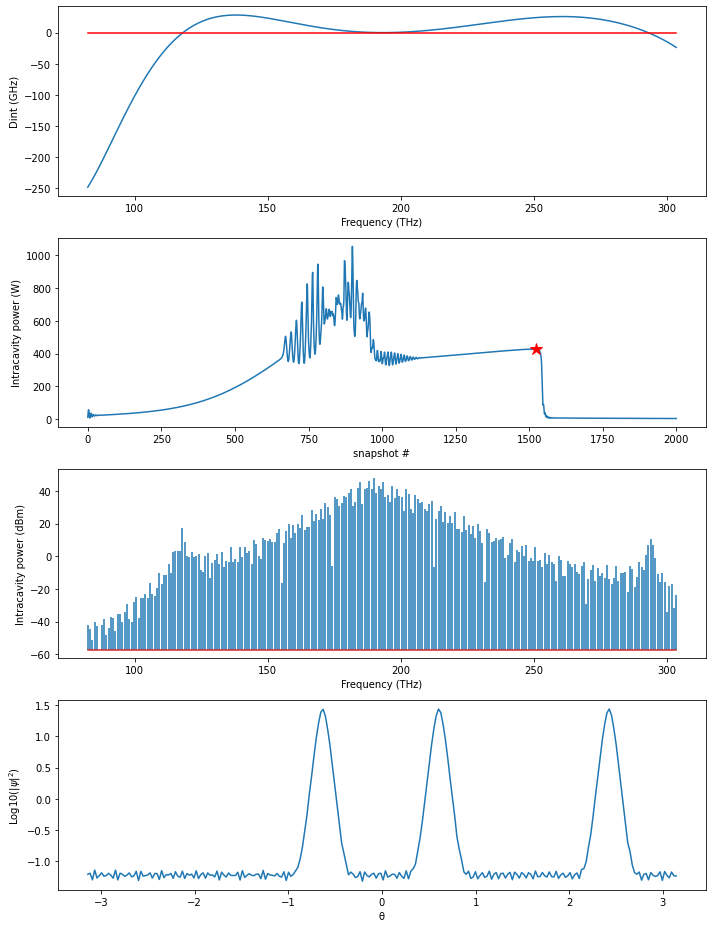

In [6]:
A.plot_all()

In [7]:
A.ifftshift(A.Δωext,A.idx)

array([1.93416029e+09, 1.89954365e+09, 1.86554657e+09, 1.83215794e+09,
       1.79936689e+09, 1.76716271e+09, 1.73553492e+09, 1.70447317e+09,
       1.67396736e+09, 1.64400752e+09, 1.61458390e+09, 1.58568688e+09,
       1.55730704e+09, 1.52943513e+09, 1.50206206e+09, 1.47517890e+09,
       1.44877688e+09, 1.42284740e+09, 1.39738198e+09, 1.37237233e+09,
       1.34781029e+09, 1.32368786e+09, 1.29999715e+09, 1.27673045e+09,
       1.25388016e+09, 1.23143883e+09, 1.20939915e+09, 1.18775393e+09,
       1.16649610e+09, 1.14561873e+09, 1.12511502e+09, 1.10497827e+09,
       1.08520192e+09, 1.06577951e+09, 1.04670472e+09, 1.02797132e+09,
       1.00957320e+09, 9.91504361e+08, 9.73758908e+08, 9.56331056e+08,
       9.39215118e+08, 9.22405512e+08, 9.05896757e+08, 8.89683467e+08,
       8.73760355e+08, 8.58122226e+08, 8.42763981e+08, 8.27680610e+08,
       8.12867194e+08, 7.98318901e+08, 7.84030986e+08, 7.69998789e+08,
       7.56217734e+08, 7.42683325e+08, 7.29391148e+08, 7.16336868e+08,
      

In [19]:
ξA = (A.Δωext+A.Δωext+A.Δωi)/A.Δωtot

In [22]:
A.ifftshift(A.Δωext,A.idx)

array([1.93416029e+09, 1.89954365e+09, 1.86554657e+09, 1.83215794e+09,
       1.79936689e+09, 1.76716271e+09, 1.73553492e+09, 1.70447317e+09,
       1.67396736e+09, 1.64400752e+09, 1.61458390e+09, 1.58568688e+09,
       1.55730704e+09, 1.52943513e+09, 1.50206206e+09, 1.47517890e+09,
       1.44877688e+09, 1.42284740e+09, 1.39738198e+09, 1.37237233e+09,
       1.34781029e+09, 1.32368786e+09, 1.29999715e+09, 1.27673045e+09,
       1.25388016e+09, 1.23143883e+09, 1.20939915e+09, 1.18775393e+09,
       1.16649610e+09, 1.14561873e+09, 1.12511502e+09, 1.10497827e+09,
       1.08520192e+09, 1.06577951e+09, 1.04670472e+09, 1.02797132e+09,
       1.00957320e+09, 9.91504361e+08, 9.73758908e+08, 9.56331056e+08,
       9.39215118e+08, 9.22405512e+08, 9.05896757e+08, 8.89683467e+08,
       8.73760355e+08, 8.58122226e+08, 8.42763981e+08, 8.27680610e+08,
       8.12867194e+08, 7.98318901e+08, 7.84030986e+08, 7.69998789e+08,
       7.56217734e+08, 7.42683325e+08, 7.29391148e+08, 7.16336868e+08,
      

In [20]:
ξB = (B.Δωext+B.Δωext+B.Δωi)/A.Δωtot

In [18]:
ξB

1.067703781940419

## define different AB - BA coupling rate arrays